# Predicting Future Sales
The data set we have available with us has been extracted from a competition of Kaggle. It is a Time Series data and we will be using it to forecast the data points of some future time period. The derived information can then be used to make better decisions accordingly.

We first import the required packages, 'Pandas' and 'Numpy'. We then load our data set.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
Sales_Data = pd.read_csv('C:/Users/salil/Desktop/AllDocuments/AnalyticsEdgeFolder/KaggleTimeSeries/sales_train.csv')

We try to examine our data set in order to get an idea about the features and the observations.

In [3]:
pd.concat([Sales_Data.head(), Sales_Data.tail()], axis=0)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0
2935848,03.10.2015,33,25,7460,299.00,1.0


We try to get some more insights from the data.

In [4]:
Sales_Data.info()
Sales_Data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


(2935849, 6)

In [5]:
type(Sales_Data.date)

pandas.core.series.Series

The 'date' column that is the daily time stamps has the data type 'object' and is in the form of series. We now convert this into a 'datetime' data type so that pandas can treat it accordingly.

In [6]:
Sales_Data['date']= pd.to_datetime(Sales_Data['date'])

In the following step we try to change the format of the 'date' column to YYYY-MM-DD.

In [7]:
Sales_Data['date'] = Sales_Data['date'].dt.strftime("%d/%m/%Y")

In [8]:
Sales_Data['date'] = pd.to_datetime(Sales_Data['date'])

In [9]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


We take a look at the unique values of the columns of the data set.

In [10]:
display(Sales_Data.date_block_num.unique())
display(len(Sales_Data.item_id.unique()))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

21807

Further in this project, we define a function where we could build a dataset as per any particular shop ID and item ID. We can further use the data set to do all kinds of analysis and forecasting.

In [11]:
def FunctionData(x):
    return Sales_Data[(Sales_Data.shop_id==x)]

In [12]:
Shop_Id_15 = FunctionData(15)

In [ ]:
#Send the data frame to excel.
#Shop_Id_15.to_excel("C:/Users/salil/Desktop/AllDocuments/AnalyticsEdgeFolder/ShopID15New.xlsx")

In [13]:
pd.concat([Shop_Id_15.head(),Shop_Id_15.tail()], axis=0)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
45576,2013-01-06,0,15,19365,349.0,1.0
45577,2013-01-12,0,15,18746,149.0,1.0
45578,2013-01-30,0,15,18748,149.0,1.0
45579,2013-01-07,0,15,18749,149.0,1.0
45580,2013-01-04,0,15,19366,399.0,1.0
2910628,2015-10-03,33,15,2293,799.0,1.0
2910629,2015-10-01,33,15,2308,299.0,1.0
2910630,2015-10-19,33,15,2308,299.0,1.0
2910631,2015-10-20,33,15,2308,299.0,1.0
2910632,2015-10-14,33,15,1971,3598.0,1.0


In [14]:
Shop_Id_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59511 entries, 45576 to 2910632
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            59511 non-null  datetime64[ns]
 1   date_block_num  59511 non-null  int64         
 2   shop_id         59511 non-null  int64         
 3   item_id         59511 non-null  int64         
 4   item_price      59511 non-null  float64       
 5   item_cnt_day    59511 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 3.2 MB


We now sort the data frame on the basis of 'date' column that is chronologically. So the earlier dates appear first and the later dates arrive at the last.

In [15]:
Shop_Id_15A = Shop_Id_15.sort_values("date")

In [16]:
pd.concat([Shop_Id_15A.head(), Shop_Id_15A.tail()], axis = 0)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
48401,2013-01-01,0,15,7814,3889.5,1.0
45772,2013-01-01,0,15,18309,199.0,1.0
47783,2013-01-01,0,15,3468,149.0,1.0
48302,2013-01-01,0,15,15005,249.0,1.0
45676,2013-01-01,0,15,19080,149.0,1.0
2907821,2015-10-31,33,15,20949,5.0,1.0
2910429,2015-10-31,33,15,3141,1180.0,1.0
2908303,2015-10-31,33,15,10201,799.0,1.0
2907989,2015-10-31,33,15,5747,999.0,1.0
2910493,2015-10-31,33,15,3351,3999.0,1.0


##### So, this is the final set of data which we have. The next steps which we will perform will be related to the cleaning of this data frame.

In [17]:
Shop_Id_15A.shape

(59511, 6)

We remove all the rows where the values of item_cnt_day and item_price are either 0 or negative. This is done because these values would otherwise make no sense.

In [18]:
Shop_Id_15A = pd.DataFrame(Shop_Id_15A[Shop_Id_15A['item_cnt_day']>=1])

In [19]:
Shop_Id_15A = pd.DataFrame(Shop_Id_15A[Shop_Id_15A['item_price']>0])

In [20]:
Shop_Id_15A.shape

(59381, 6)

In the following step, we add the number of all the items sold on any particular date. 

In [21]:
Shop_Id_15B = pd.DataFrame(Shop_Id_15A.groupby(['date'])['item_cnt_day'].sum())

In [22]:
Shop_Id_15B

,item_cnt_day
date,
2013-01-01,124.0
2013-01-02,159.0
2013-01-03,156.0
2013-01-04,168.0
2013-01-05,134.0
...,...
2015-10-27,34.0
2015-10-28,12.0
2015-10-29,22.0


##### In the following steps, as part of EDA, we do some data visualization.
We download the required packages.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

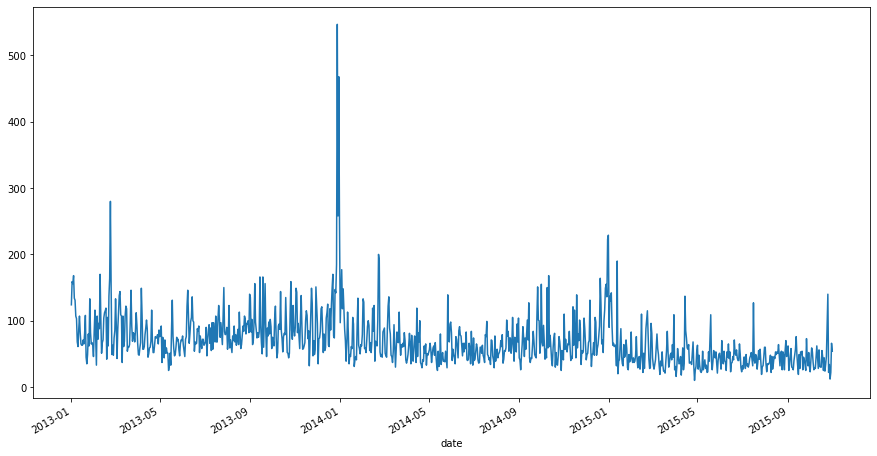

In [24]:
Shop_Id_15B['item_cnt_day'].plot(figsize=(15,8))

In [25]:
Shop_Id_15B['item_cnt_day'].nlargest(10)

date
2013-12-28    547.0
2013-12-30    468.0
2013-02-23    280.0
2013-12-29    258.0
2013-12-31    248.0
2014-12-31    229.0
2014-12-30    223.0
2014-02-22    200.0
2014-02-23    191.0
2015-01-12    190.0
Name: item_cnt_day, dtype: float64

As visible from the graph, there is one sharp spike. 

Also, when we derive the 10 largest values from the dataset, the top 2 look like extreme data points. 

This outlier(s) can cause some problem in our forecast. We therefore try to remove them. We first check the outliers using a boxplot.

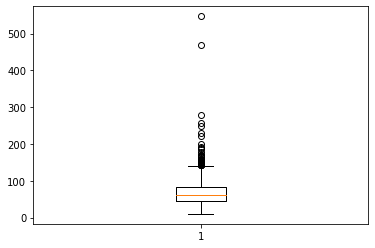

In [26]:
plt.boxplot(Shop_Id_15B['item_cnt_day']);

We will use the IQR method to remove the outliers.

In [27]:
Shop_Id_15B.describe()

,item_cnt_day
count,1033.000000
mean,69.052275
std,39.470787
min,10.000000
25%,45.000000
50%,61.000000
75%,83.000000
max,547.000000


In [28]:
Q1 = Shop_Id_15B.item_cnt_day.quantile(0.25)
Q3 = Shop_Id_15B.item_cnt_day.quantile(0.75)
IQR = Q3 - Q1

In [29]:
#Lower Limit
LL = Q1 - 1.5*IQR

#Upper Limit
UL = Q3 + 1.5*IQR

print(LL, UL)

-12.0 140.0


In [30]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [31]:
outlier_pt=detect_outliers(Shop_Id_15B.item_cnt_day)

In [32]:
outlier_pt

[280.0, 547.0, 258.0, 468.0, 248.0, 200.0, 191.0, 223.0, 229.0, 190.0]

As the IQR method would lead to removal of more number of data points, we would consider using the z-score method for the removal of the outliers.

As the lowest value is 190, so we would replace all greater values by mean.

In [33]:
Shop_Id_15B["item_cnt_day"] = np.where(Shop_Id_15B["item_cnt_day"] >=190, Shop_Id_15B.item_cnt_day.mean(),Shop_Id_15B['item_cnt_day'])

In [34]:
Shop_Id_15B.item_cnt_day.describe()

count    1033.000000
mean       66.977273
std        31.246761
min        10.000000
25%        45.000000
50%        61.000000
75%        82.000000
max       185.000000
Name: item_cnt_day, dtype: float64

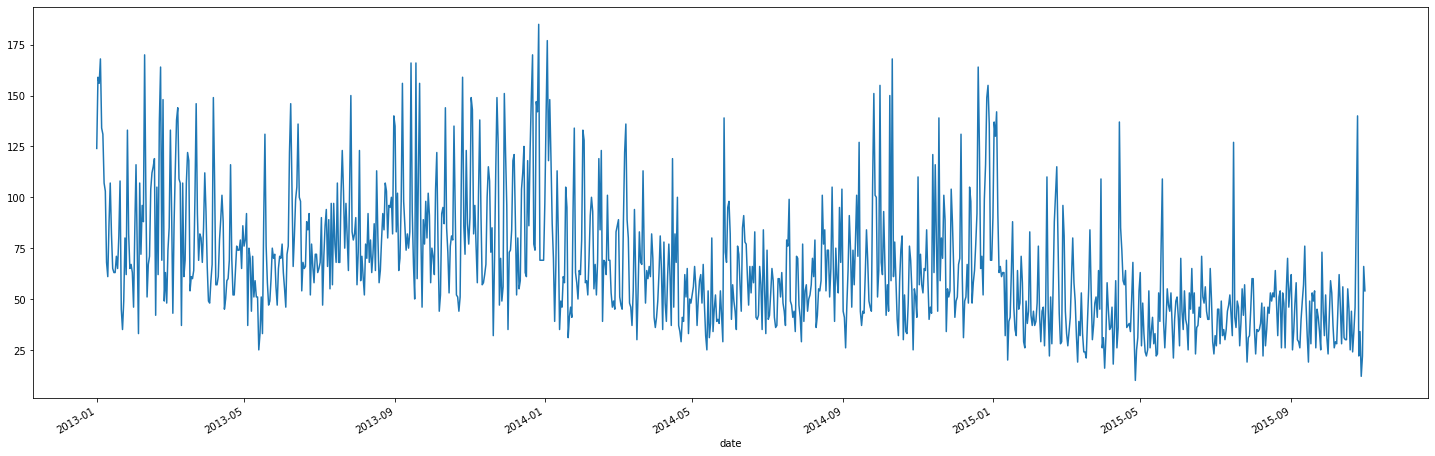

In [35]:
Shop_Id_15B['item_cnt_day'].plot(figsize=(25,8))

There are no null values in the data set as can be seen from the output of the following cell.

In [36]:
Shop_Id_15B.isnull().sum()

item_cnt_day    0
dtype: int64

The next and one of the most important step in our project is to check the stationarity of the Time Series data. We use the Augmented Dickey Fuller test for the same. We first load in the required package.

In [37]:
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")

We now define a function to carry out the hypothesis testing. As mentioned in the following cell, the null hypothesis is that the Data set has a unit root and is non-stationary. On the other hand the alternative hypothesis is that the Data set has no unit root and is stationary. As per the general rule of hypothesis testing, we will assume the null hypothesis to be true and try to find evidence against it.

In [39]:
def adfuller_test(item_cnt_day):
    result=adfuller(item_cnt_day)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [40]:
adfuller_test(Shop_Id_15B['item_cnt_day'])

ADF Test Statistic : -2.911144208943459
p-value : 0.04406734057324369
#Lags Used : 21
Number of Observations Used : 1011
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


The p-value is on the brim. So we can either have a lower critical value with a concise significant region or perform differencing to make the data set even more stationary.

In [41]:
Shop_Id_15B['FirstDiff'] = Shop_Id_15B['item_cnt_day'] - Shop_Id_15B['item_cnt_day'].shift(1)

In [42]:
Shop_Id_15B

,item_cnt_day,FirstDiff
date,,
2013-01-01,124.0,NaN
2013-01-02,159.0,35.0
2013-01-03,156.0,-3.0
2013-01-04,168.0,12.0
2013-01-05,134.0,-34.0
...,...,...
2015-10-27,34.0,12.0
2015-10-28,12.0,-22.0
2015-10-29,22.0,10.0


In [43]:
adfuller_test(Shop_Id_15B['FirstDiff'].dropna())

ADF Test Statistic : -10.051614307391732
p-value : 1.407687447299787e-17
#Lags Used : 20
Number of Observations Used : 1011
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


We have therefore received a satisfactory p-value. We plot the column and try to visually interpret the stationarity.

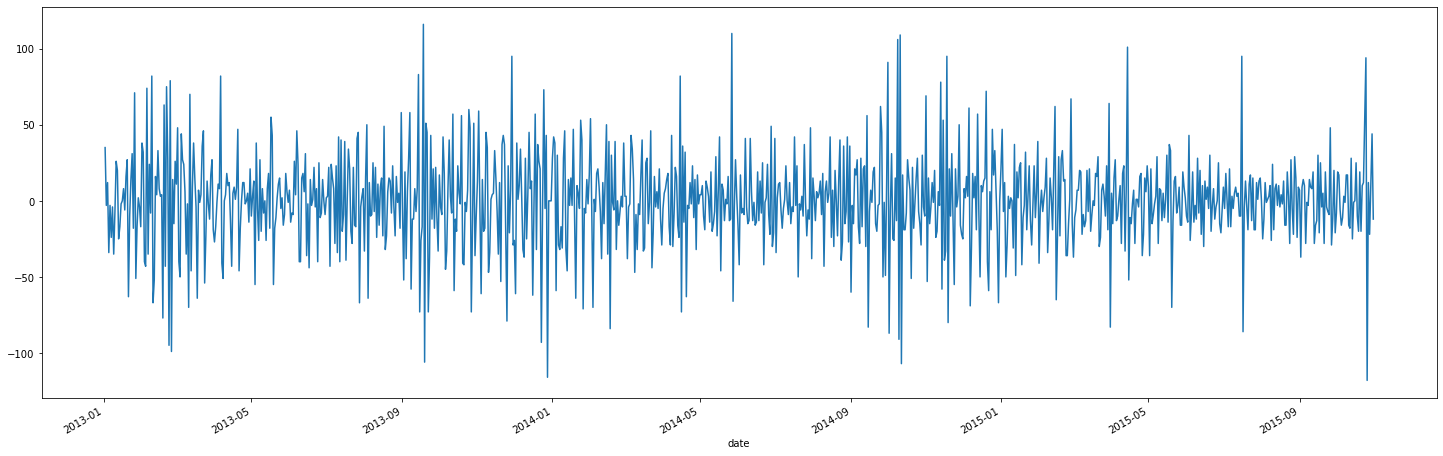

In [44]:
Shop_Id_15B['FirstDiff'].plot(figsize=(25,8))

To get an idea of the trend, we smooth the series with the help of moving average.

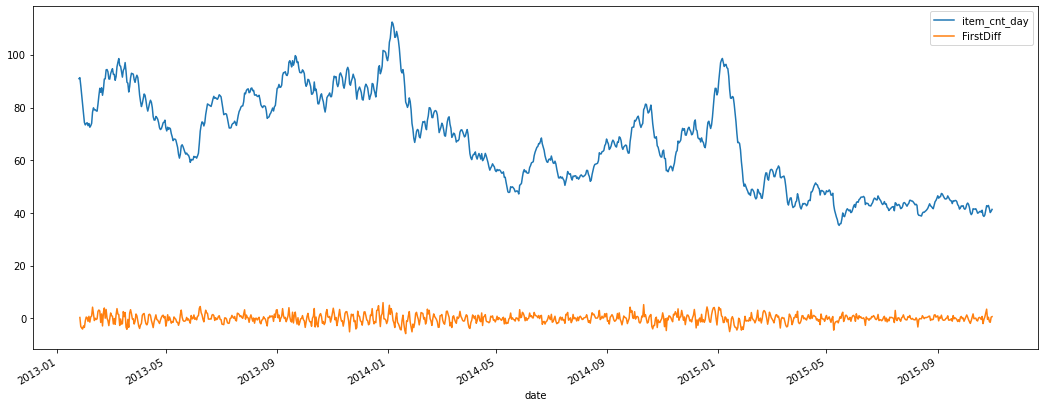

In [45]:
Shop_Id_15B_MA = Shop_Id_15B.rolling(window = 25).mean().plot(figsize=(18,7))

WE CREATE A BASELINE MODEL. Any other model which will be created further should be better than this. In this model we create a column in which the value of every subsequent observation is equal to the value in the previous time stamp. 

In [46]:
Baseline1 = pd.concat([Shop_Id_15B, Shop_Id_15B['item_cnt_day'].shift(1)], axis=1)
Baseline1.columns = ["Actual_item_cnt", "FirstDiff", "Forecasted_item_cnt"]
Baseline1 = Baseline1[["Actual_item_cnt", "Forecasted_item_cnt", "FirstDiff"]]

After rearranging the columns, the data set looks something like this.

In [47]:
Baseline1

,Actual_item_cnt,Forecasted_item_cnt,FirstDiff
date,,,
2013-01-01,124.0,NaN,NaN
2013-01-02,159.0,124.0,35.0
2013-01-03,156.0,159.0,-3.0
2013-01-04,168.0,156.0,12.0
2013-01-05,134.0,168.0,-34.0
...,...,...,...
2015-10-27,34.0,22.0,12.0
2015-10-28,12.0,34.0,-22.0
2015-10-29,22.0,12.0,10.0


As the first element of the second column and third column is a NaN value, so we will remove the first row of the data frame.

In [48]:
Baseline1 = Baseline1[1:]
Baseline1

,Actual_item_cnt,Forecasted_item_cnt,FirstDiff
date,,,
2013-01-02,159.0,124.0,35.0
2013-01-03,156.0,159.0,-3.0
2013-01-04,168.0,156.0,12.0
2013-01-05,134.0,168.0,-34.0
2013-01-06,131.0,134.0,-3.0
...,...,...,...
2015-10-27,34.0,22.0,12.0
2015-10-28,12.0,34.0,-22.0
2015-10-29,22.0,12.0,10.0


We load in the necessary packages to check the error of the naive model created.

In [49]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [50]:
Baseline1MSE = mean_squared_error(Baseline1.Actual_item_cnt, Baseline1.Forecasted_item_cnt)
np.sqrt(Baseline1MSE)

30.84841813967804

#### The Root Mean Square Error of any other model should be lower than that of Baseline Model 1. The first model which we try building above the baseline model is the ARIMA model. We will be trying to check the error values of different orders.

    Auto Regressive(p) Integrated(d) Moving Average(q) (ARIMA model)

We need to figure the values of p,d and q. This means we have to identify the best possible values of the Auto Regressive lag, the Differencing lag and the Moving Average lag. Identification of the AR lag value is best done with the Partial Auto Correlation plot and that of the MA lag value is best done with the Auto Correlation plot.

We first load the required packages.

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

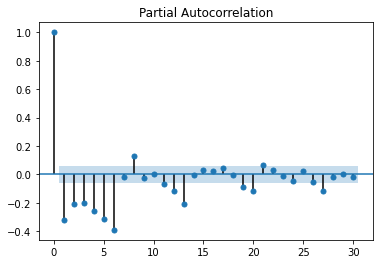

In [52]:
plot_pacf(Shop_Id_15B['FirstDiff'].iloc[1:], lags=30);

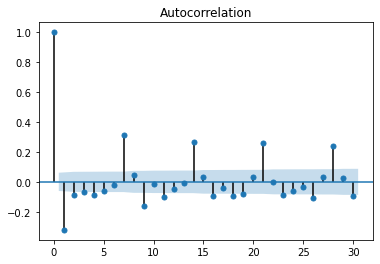

In [53]:
plot_acf(Shop_Id_15B['FirstDiff'].iloc[1:], lags=30);

Instead of using the trial and error method, one option which python provides us with is the 'pmdarima' package that is the pyramid ARIMA package. In this we can perform a grid search of the various combinations of the lag values or the order.

In [226]:
#pip install pmdarima

In [54]:
from pmdarima import auto_arima

In [55]:
ARIMA_fit1 = auto_arima(Shop_Id_15B['FirstDiff'].dropna(), start_p=1, start_q=1,
                          max_p=6, max_q=3,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)   

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=9613.047, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10008.322, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9897.770, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9686.355, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9612.885, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9852.743, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=9602.713, Time=0.42 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9812.028, Time=0.06 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=9578.246, Time=0.37 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=9743.558, Time=0.09 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=9544.556, Time=0.39 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=9637.648, Time=0.12 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=9472.221, Time=0.78 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=9470.306, Time=0.59 sec
 ARIMA(6,0,0)(0,0,0)[0] intercep

We do a split of the data set into Training set and Test set.

In [56]:
Shop_Id_15BTrain = Shop_Id_15B[1:933]
Shop_Id_15BTest = Shop_Id_15B[933:1033]
display(Shop_Id_15BTrain.head())
display(Shop_Id_15BTest.head())

,item_cnt_day,FirstDiff
date,,
2013-01-02,159.0,35.0
2013-01-03,156.0,-3.0
2013-01-04,168.0,12.0
2013-01-05,134.0,-34.0
2013-01-06,131.0,-3.0


,item_cnt_day,FirstDiff
date,,
2015-07-23,55.0,17.0
2015-07-24,42.0,-13.0
2015-07-25,57.0,15.0
2015-07-26,38.0,-19.0
2015-07-27,19.0,-19.0


We now load in the ARIMA package to create the model and fit it.

In [57]:
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings("ignore")

In [58]:
ModelARIMA1 = ARIMA(Shop_Id_15BTrain['item_cnt_day'], order=(6,1,6))
ModelARIMA1_fit = ModelARIMA1.fit()
ModelARIMA1_fit.aic

8473.505940440959

In [59]:
ModelARIMA1_forecast = ModelARIMA1_fit.forecast(steps = 100)[0]
ModelARIMA1_forecastMSE = mean_squared_error(Shop_Id_15BTest['item_cnt_day'], ModelARIMA1_forecast)
np.sqrt(ModelARIMA1_forecastMSE)

15.839928012701755

So, out of all the combination of orders tested, this is the best ARIMA model we could build with the least AIC value and the manageable Root Mean Square Error value.

In the final step, we try to plot a graph of the actual values which were present in the test set and the values which we forecasted using the model that we built.

In [60]:
ModelARIMA1_forecastdf = pd.DataFrame(ModelARIMA1_forecast)
ModelARIMA1_forecastdf.index = Shop_Id_15BTest.index
ForecastGraph_ShopID_15 = pd.concat([Shop_Id_15BTest['item_cnt_day'], ModelARIMA1_forecastdf], axis=1)
ForecastGraph_ShopID_15.columns = ["item_cnt_day", "fit_values"]
ForecastGraph_ShopID_15['fit_values'] = ForecastGraph_ShopID_15['fit_values'].round(decimals=2)
ForecastGraph_ShopID_15

,item_cnt_day,fit_values
date,,
2015-07-23,55.0,42.32
2015-07-24,42.0,42.74
2015-07-25,57.0,52.63
2015-07-26,38.0,47.20
2015-07-27,19.0,36.52
...,...,...
2015-10-27,34.0,28.20
2015-10-28,12.0,31.00
2015-10-29,22.0,36.93


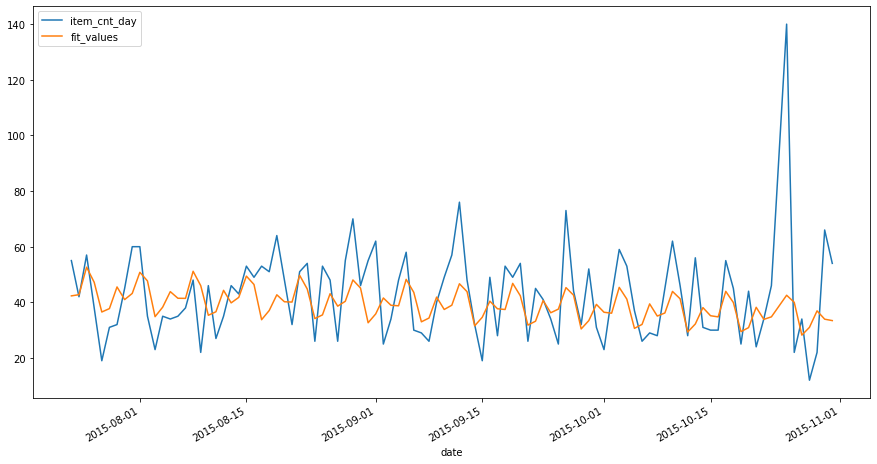

In [61]:
ForecastGraph_ShopID_15.plot(figsize=(15,8))

In the previous section, we had worked with daily data. In the following section, we will work with monthly data and use the column 'date_block_num'.

In [62]:
Shop_Id_15_MonthlyCount = Shop_Id_15[["date_block_num", "item_cnt_day"]]

Now, we do some cleaning of the data. First, remove all the rows where the values of item_cnt_day are either 0 or negative.

In [63]:
Shop_Id_15_MonthlyCountX = pd.DataFrame(Shop_Id_15_MonthlyCount[Shop_Id_15_MonthlyCount['item_cnt_day']>=1])

In the following step, we add the number of all the items sold on any particular date. 

In [64]:
Shop_Id_15_MonthlyCountX = pd.DataFrame(Shop_Id_15_MonthlyCountX.groupby(['date_block_num']).sum())
Shop_Id_15_MonthlyCountX.columns = ["Count"]
Shop_Id_15_MonthlyCountX.head()

,Count
date_block_num,
0,2730.0
1,2756.0
2,2840.0
3,2169.0
4,1933.0


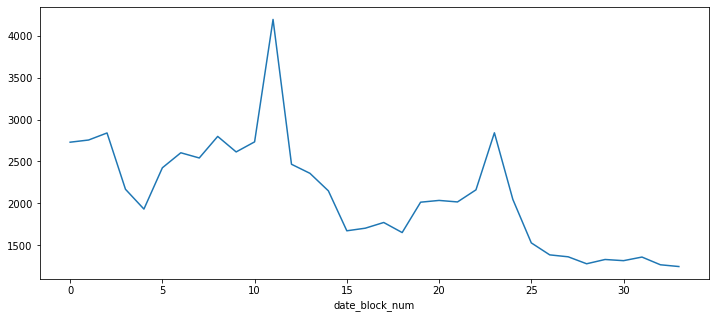

In [65]:
Shop_Id_15_MonthlyCountX['Count'].plot(figsize=(12,5))

Next, we check the stationarity of the Time Series data.

In [66]:
adfuller_test(Shop_Id_15_MonthlyCountX['Count'])

ADF Test Statistic : -2.1862502947604945
p-value : 0.21127359994273642
#Lags Used : 0
Number of Observations Used : 33
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


We, therefore try to make it stationary.

First we try to check if there exists asny seasonality as from the graph it is visible that some seasonality might be present.

We therefore use the seasonal decompose function to separate the trend and seasonal component.

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

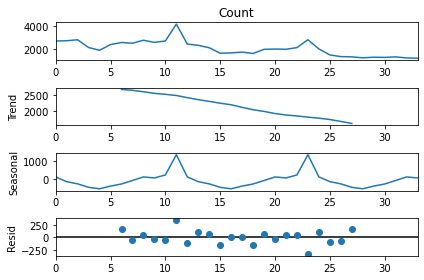

In [68]:
SeasonalDecompose = seasonal_decompose(Shop_Id_15_MonthlyCountX['Count'], model='add', period = 12)
SeasonalDecompose.plot();

We now do the differencing to make the data stationary.

In [69]:
Shop_Id_15_MonthlyCountX['FirstDiff'] = Shop_Id_15_MonthlyCountX['Count'] - Shop_Id_15_MonthlyCountX['Count'].shift(1)
Shop_Id_15_MonthlyCountX.head()

,Count,FirstDiff
date_block_num,,
0,2730.0,NaN
1,2756.0,26.0
2,2840.0,84.0
3,2169.0,-671.0
4,1933.0,-236.0


In [70]:
Shop_Id_15_MonthlyCountX['SeasonalFirstDiff'] = Shop_Id_15_MonthlyCountX['Count'] - Shop_Id_15_MonthlyCountX['Count'].shift(12)
Shop_Id_15_MonthlyCountX.head(15)

,Count,FirstDiff,SeasonalFirstDiff
date_block_num,,,
0,2730.0,NaN,NaN
1,2756.0,26.0,NaN
2,2840.0,84.0,NaN
3,2169.0,-671.0,NaN
4,1933.0,-236.0,NaN
5,2425.0,492.0,NaN
6,2604.0,179.0,NaN
7,2542.0,-62.0,NaN
8,2799.0,257.0,NaN


Again we perform the adf test to check the stationarity.

In [71]:
adfuller_test(Shop_Id_15_MonthlyCountX['SeasonalFirstDiff'].dropna())

ADF Test Statistic : -4.5730798026511765
p-value : 0.00014476008375268628
#Lags Used : 0
Number of Observations Used : 21
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


We check the graph again.

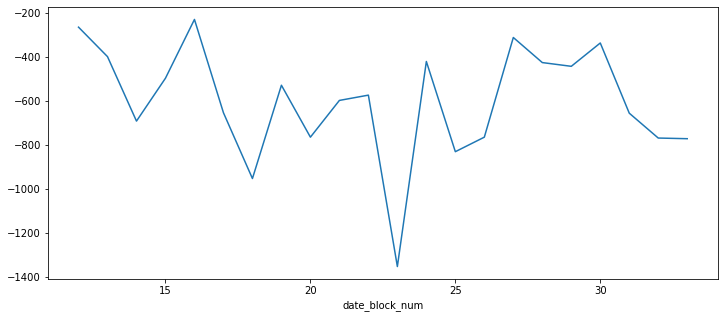

In [72]:
Shop_Id_15_MonthlyCountX['SeasonalFirstDiff'].plot(figsize=(12,5))

As our data has seasonality, we will use a SARIMA model to forecast our data.

First we try to determine the order of the model.

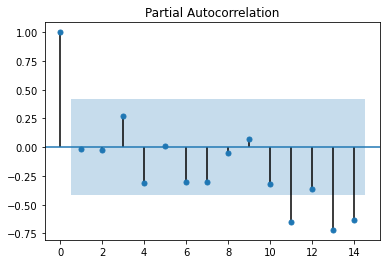

In [73]:
plot_pacf(Shop_Id_15_MonthlyCountX['SeasonalFirstDiff'].iloc[12:]);

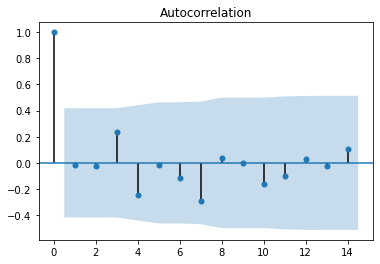

In [74]:
plot_acf(Shop_Id_15_MonthlyCountX['SeasonalFirstDiff'].iloc[12:]);

So the value of p and q is 1. The value of d will be equal to 1 as well as differencing was done only once.

We now import the required package and build the SARIMA model to forecast the values.

In [75]:
import statsmodels.api as sm

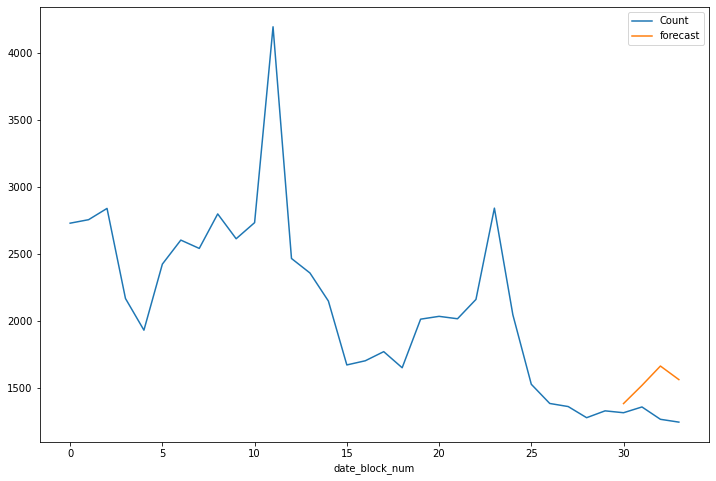

In [76]:
model=sm.tsa.statespace.SARIMAX(Shop_Id_15_MonthlyCountX['Count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
Shop_Id_15_MonthlyCountX['forecast']=results.predict(start=30,end=34,dynamic=True)
Shop_Id_15_MonthlyCountX[['Count','forecast']].plot(figsize=(12,8))

The surge in the forecasted line is because of seasonal spikes in the respective periods of the last 2 years.